# RK Model 
- The model is an attempt to understand the influence of physical processes in cold regions. A 2-D transect along the Yakou catchement (Tibetan Plateau, Heihe river basin) is the field site.   
- The notebook describes the model configurations, prepares the dataset (if required), extracts the output and plots it. 

### Brief description:

**Goal – To check the difference between the model performance for daily air temperature and subsurface temperature at 0.04 m**

- T : 1 year (365 days) - Daily time steps 
- Processes: Subsurface permafrost - flow, energy
- Mesh: Pseudo 1-D column with three layers - organic, mineral, and bedrock layer with increasing cell sizes.
- Initial conditions : -1.0 m – hydrostatic head (in m) to represent the permafrost table level or active layer, 264.15 K (-3°C).
- Boundary conditions :  Top - **Actual daily air temprature (2017) **
- Note that the VGc properties of bedrock are less significant since they are mostly saturated.

- Parameters:
    - Thermal conductivity: Peat – L_dry – 0.07 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Thermal conductivity: Mineral & Bedrock – L_dry – 0.29 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Porosity, Compressible porosity: Peat – 0.85, 1e-07 Pa^-1; Mineral – 0.5, 1e-08 Pa^-1;
    - Permeability: Peat – 5e-11 m^2, Mineral & Bedrock – 2e-13 m^2 
    - Density: Peat – 700 kg/m^3, Mineral & Bedrock – 2170 kg/m^3

**The standard VGc values (The values change based on the simulation):
    - Peat: alpha = 0.001, n = 1.4, sr = 0.1, smoothing_interval = 0.1
    - Mineral: alpha = 0.0002, n = 1.4, sr = 0.05, smoothing_interval = 0.1
    - Bedrock: alpha = 0.03, n = 2, sr = 0.05, smoothing_interval = 0.1
**

- Observations:
    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.

- I/O files:
    - Xml file: Case1_B_IV_TB.xml & Case1_B_IV.xml
    - Output folders (.demo file): 
        - Case1_B_IV_TB.demo & 
        - Case1_B_IV.demo


- Expected results: The case with subsurface temperature at 0.04 m as the top B.C will have better results compared to the case with air temperature. 
    
### Detailed description:

#### 1. Physical processes - Cases: Case 1
The physical processes that are considered - Subsurface flow + Subsurface energy (with ice content). A custom strong coupler - 'subsurface permafrost' couples the 'permafrost flow' and 'three-phase energy' PKs. 

<img src='../figures/Case1_process.jpg' width='500' height='500' alt='Case1 physical process' align='center' />  




#### 2. Mesh - Stages: Stage B
Two types of meshes are considered here. The first mesh (Yakou_column.exo) resembles the properties of the hillslope transect that we would like to simulate. Once the meshing issues are resolved, we will be using this mesh. The second mesh is a test mesh that was generated by the ATS developers with similar properties. We will be using this mesh. 

1. Yakou_column.exo - Organic layer (0.25 m), Mineral layer (0.25 - 20 m), Bedrock (20 – 40 m) with increasing cell thickness. [Cell thickness: 0.05 m until 0.25 m (Organic layer); 0.05 m until 0.25 m and increasing cell size by 2 units until 2 m, 2 m - 20 m, we have 2 m cell sizes (Mineral layer); we again have 2 m cell sizes from 20 m - 40 m]

2. tes_org_spinup_column.exo - Organic layer (0.385 m), Mineral layer (2.24 m), Bedrock (42.48 m); Cell thickness starts with a magnitude of 0.01 m and increases in magnitude of 1.2, 1.4 & 1.5 as cell numbers increase from 20, 20 - 26, and >26. 

##### Mesh - Run it with yakou_column.xml once the meshing issues has been resolved.  

Images of 'tes_org_spinup_column.exo':

<img src='../figures/1D_test_org_spinup_column_1.PNG' width='70' height='90' alt='1D_test_org_column_1' align='left' />  

<img src='../figures/1D_test_org_spinup_column_2.PNG' width='120' height='200' alt='1D_test_org_column_2' align='center' />  



#### 3. Scenarios (IC, BC): Scenario I


| :------:               | IC   |  BC    |                 
| :----------------------------------------------------------------- | :------: | :------: |  
| Hydraulic                                                          | Hydrostatic head (-1 m) | - |
| Thermal                                                            |  270.15 K (-3 °C)   |  BCTopAiractualT = actual daily air temperature (2017) |

##### Time period (T) of 5 years (daily time step)


#### 4. Parameters:


|Sl. No.|	Parameter type|	Parameter|	Unit|	Soil type/Water	|Current value|
| --- | --- | --- | --- | --- | --- |
1 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha |	Pa^{-1} |	Peat |	0.0005 |
2 |	Variably saturated properties - van Genuchten model |	van Genuchten n |	[-] | Peat |		1.39
3 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-] | Peat |		0.05
4 |	Variably saturated properties - van Genuchten model |	smoothing interval width 	| [saturation] | Peat |		0.05
5 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	Pa^{-1} | Mineral |	0.0005
6 |	Variably saturated properties - van Genuchten model |	van Genuchten n	| [-]	| Mineral |		1.39
7 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-]	| Mineral |		0.05
8 |	Variably saturated properties - van Genuchten model |	smoothing interval width  |	[saturation] | Mineral |			0.05
9 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	| Pa^{-1}	| Bedrock |	2.00E-05
10 | Variably saturated properties - van Genuchten model |		van Genuchten n	| [-] | Bedrock |	1.58
11 | Variably saturated properties - van Genuchten model |		residual saturation	| [-]	| Bedrock |	0.2
12 | Variably saturated properties - van Genuchten model |		smoothing interval width 	| [saturation] | Bedrock |		0.05
13 | 	Permafrost model parameters - fpd permafrost model [Cryosuction] |	minimum dsi_dpressure magnitude |	??	| For the entire model |	1.00E-12 |
14 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Peat |	0.67 |
15 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Peat |		0.07 |
16 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Peat |	1 |
17 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-]	|	Peat |	0.5 |
18 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Mineral |	1 |
19 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry | [W m^-1 K^-1] |	Mineral |		0.29 |
20 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen| [-] |	Mineral |		1 |
21 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen | [-] |	Mineral |		0.5 |
22 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) |	[W m^-1 K^-1] |	Bedrock |	1 |
23 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Bedrock |		0.29 |
24 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Bedrock |	1 |
25 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-] |	Bedrock |		0.5 |
39 |	Physical |	Base porosity |	[-] |	Peat |	0.85 |
40 |	Physical |	Base porosity |	[-]	 | Mineral |	0.5 |
41 |	Physical |	Base porosity | [-]	| bedrock	 | 0.5 |
42 |	Physical |	Pore compressibility	| [Pa^-1] |	Peat |	1.00E-07 |
43 |	Physical |	Pore compressibility	| [Pa^-1] |	Mineral |	1.00E-08 |
44 |	Physical |	Pore compressibility	| [Pa^-1] |	bedrock |	1.00E-08 |
45 |	Physical / Hydraulic |	Permeability	| m^2? |	Peat |	5.00E-11 |
46 |	Physical / Hydraulic |	Permeability	|m^2? |	Mineral |	2.00E-13 |
47 |	Physical / Hydraulic |	Permeability	| m^2? |	bedrock |	2.00E-13 |
48 |	Physical |	Density	| kg/m^3? |	Peat |	7.00E+02 |
49 | 	Physical |	Density	|kg/m^3? |	Mineral |	2.17E+03 |
50 |	Physical |	Density	|kg/m^3? |	bedrock |	2.17E+03 |

- The values of Bedrock are currently similar to that of Minerals. While conducting the parameter sensitivity analysis, the values will be changed.

#### 5. Visualization:

- The entire subsurface domain is visualized. 
- Cycles start period stop" - "{0,100,-1}". The unit is in days. Every 100 days, one observation instance of the entire column is dumped. T = 1825 days, therefore 20 instances are stored. 

#### 6. Observations:

- The variables under observation taken every day - {0.0,1.0,-1.0}: 

    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.


#### I/O files:

- Dataset: Subsurface temperature at 5 cm & Air temperature at 5 m prepared in the notebook - /home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/**AWS_final_metdata_2015_20.ipynb
- I/O files:
    - Xml file: Case1_B_IV_TB.xml & Case1_B_IV.xml
    - Output folders (.demo file): 
        - **Case1_B_IV_TB.demo** & 
        - Case1_B_IV.demo

## Workflow:
1. Importing all the modules
2. Plotting the input data 
3. Plotting with the ats output code.
4. Plotting the visualization results.
5. Preparing the final results as initial conditions for another model (not required) 
6. Plotting the observation results.
7. Comparing the simulation results with the measurements
8. Finding the RMSE value - yearly average and monthly average

### 1. Importing all the modules

In [1]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB_0cm


In [27]:
# Output directory name & input xml file name:
file_name_2 = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB_0cm/Case1_B_IV_TB_0cm.demo'
file_name = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB_0cm/Case1_B_IV_TB_0cm.demo'
#input_filename_2 = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB/Case1_B_IV.xml'
#input_filename = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB/Case1_B_IV_TB.xml'
### Reading the observation files:
file_observation_2 = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB_0cm/Case1_B_IV_TB_0cm.demo/observation.dat'
file_observation = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB_0cm/Case1_B_IV_TB_0cm.demo/observation.dat'
file_obs_name_2 = 'Case1_B_IV_TB_0cm.dat'
file_obs_name = 'Case1_B_IV_TB_0cm.dat'
# Filename measurements: (Always give the relative path and not a absolute path)
filename_measurements = '../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

### 2. Plotting the input data

In [11]:
input_data_file_name = 'Data/Yakou_data_subtemp0cm_2017.h5'

In [12]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{input_data_file_name}','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp_2017_5yrs = np.array(hdf.get('air temperature [K]'))
    precip_2017_5yrs = np.array(hdf.get('precipitation rain [m s^-1]'))
    snowprecip_2017_5yrs = np.array(hdf.get('precipitation snow [m SWE s^-1]'))
    subtemp_0cm = np.array(hdf.get('Soil temperature at - 0.00 m (K)'))
    #print(air_temp_2017_5yrs)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.00 m (K)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation rain [mols m^-2 s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']




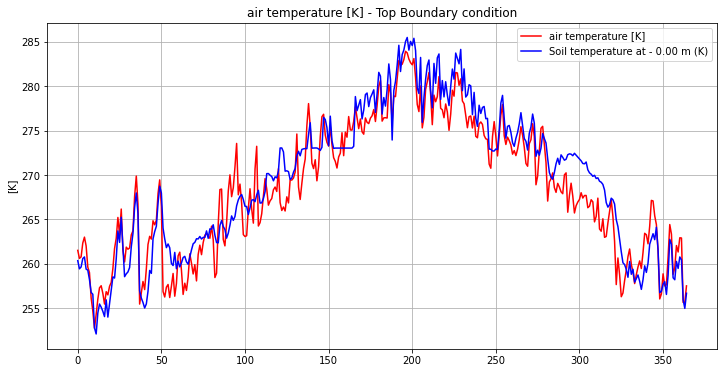

In [13]:
plt.figure(figsize=(12, 6))
plt.title('air temperature [K] - Top Boundary condition')
plt.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
plt.plot(subtemp_0cm, 'b',label='Soil temperature at - 0.00 m (K)')
plt.ylabel('[K]')
plt.legend()
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
plt.grid(True)

### 2. Plotting with the ATS output code

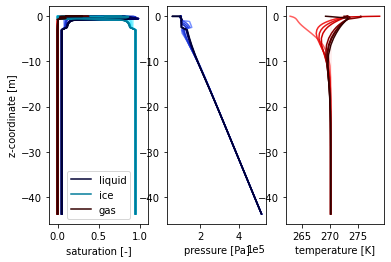

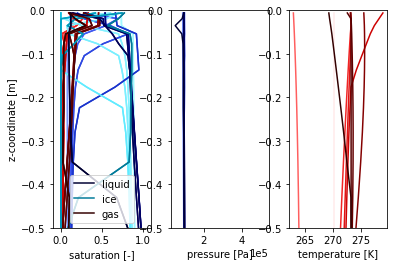

In [14]:
def plot(dirname, axs):
    """A generic plotting function that plots saturation as a function of depth."""

    plot_column_data.plot_subsurface(vis, ['pressure',], axs[0], cmap='jet')
    axs[0].set_xlabel('pressure [Pa]')
    ax.set_ylabel('z [m]')
    
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[1], None, cmap='jet')
    axs[0].set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

def plot(file_name, axs, style):
    # load the data
    vis = ats_xdmf.VisFile(file_name, time_unit='d')
    vis.loadMesh(columnar=True)
    dati = np.array([vis.getArray(v) for v in ["pressure", "pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"]])
    times = vis.times
    
    ice = colors.cm_mapper(-10, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-10, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-10, times[-1], colors.gas_cmap())    
    
    # plot saturation of liquid, pressure
    z = vis.centroids[:,2]
    for i,t in enumerate(times):
        label = False
        if i == len(times)-1:
            axs[0].plot(dati[2,i,:],z, style, color=water(t), label='liquid')
            axs[0].plot(dati[3,i,:],z, style, color=ice(t), label='ice')
            axs[0].plot(dati[4,i,:],z, style, color=gas(t), label='gas')
        else:
            axs[0].plot(dati[2,i,:],z, style, color=water(t))
            axs[0].plot(dati[3,i,:],z, style, color=ice(t))
            axs[0].plot(dati[4,i,:],z, style, color=gas(t))
        axs[2].plot(dati[5,i,:],z, style, color=gas(t))
        axs[1].plot(dati[1,i,:],z, style, color=water(t))
        axs[0].plot(dati[2,i,:],z, style, color=water(t))
        axs[0].plot(dati[3,i,:],z, style, color=ice(t))
        axs[0].plot(dati[4,i,:],z, style, color=gas(t))

def decorate(axs):
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [K]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    axs[0].set_xlim([-.1,1.1])
    axs[0].legend()


# full column
fig, axs = plt.subplots(1,3)
plot(file_name, axs, '-')
decorate(axs)

# and a zoomed version
fig, axs = plt.subplots(1,3)
plot(file_name, axs, '-')
decorate(axs)
axs[0].set_ylim([-0.5,0])
axs[1].set_ylim([-0.5,0])
axs[2].set_ylim([-0.5,0])


plt.show()
            

In [15]:
# load the ATS solution
directory = f"{file_name}"
vis = ats_xdmf.VisFile(directory)
vis.loadMesh(columnar=True)

#### 5. Plotting the observation results.

In [16]:
file_observation

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB_0cm/Case1_B_IV__TB_0cm.demo/observation.dat'

In [17]:
file_obs_name

'Case1_B_IV_TB_0cm.dat'

In [19]:
file_observation

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB_0cm/Case1_B_IV__TB_0cm.demo/observation.dat'

In [23]:
file_obs_name

'observation.dat'

In [26]:
file_observation

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB_0cm/Case1_B_IV__TB_0cm.demo/observation.dat'

In [28]:
# Removing the hash lines in the intial part of the script
# https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string
remove_hashs = ['#']

# Opening the observation.dat file, 
# removing the lines with a hash and storing it in a new file - observation_2.dat
with open(f'{file_observation}') as oldfile, open(f'{file_obs_name}', 'w') as newfile:
    for line in oldfile:
        if not any(remove_hash in line for remove_hash in remove_hashs):
            newfile.write(line)

In [29]:
file_observation_2

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_TB_0cm/Case1_B_IV_TB_0cm.demo/observation.dat'

In [30]:
# Removing the hash lines in the intial part of the script
# https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string
remove_hashs = ['#']

# Opening the observation.dat file, 
# removing the lines with a hash and storing it in a new file - observation_2.dat
with open(f'{file_observation_2}') as oldfile, open(f'{file_obs_name_2}', 'w') as newfile:
    for line in oldfile:
        if not any(remove_hash in line for remove_hash in remove_hashs):
            newfile.write(line)

In [31]:
# Reading the csv file 
df_observation = pd.read_csv(f'{file_obs_name}',sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']


In [32]:
# Reading the csv file 
df_observation_2 = pd.read_csv(f'{file_obs_name_2}',sep=' ')
df_observation_2['time [days]'] = df_observation_2['time [s]']/86400
df_observation_2.index = df_observation_2['time [days]']


#### Plotting the values 

### Plotting temperature, saturation of liquid, and saturation of ice

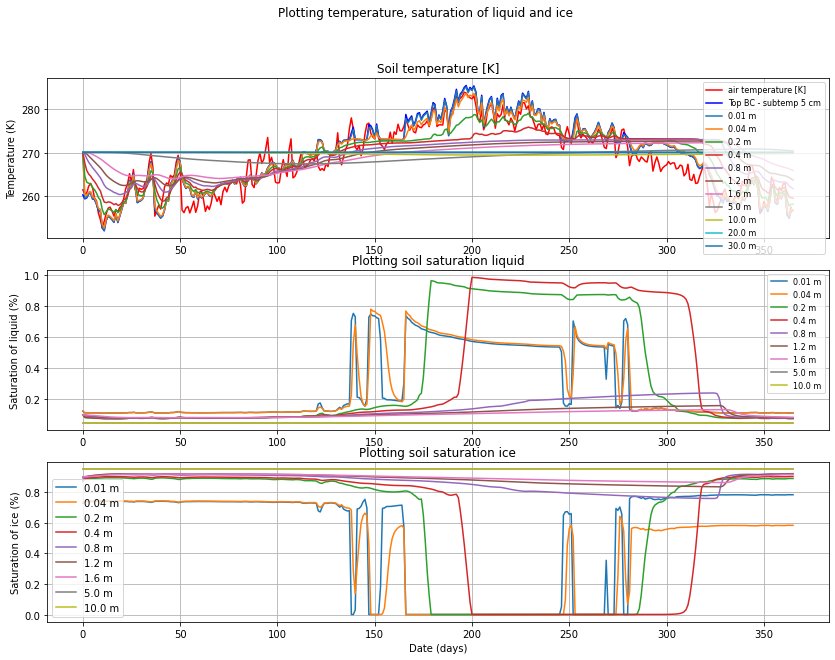

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(w=14,h=10)
fig.suptitle('Plotting temperature, saturation of liquid and ice')

ax1.set_title('Soil temperature [K]')
ax1.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
ax1.plot(subtemp_0cm, 'b',label='Top BC - subtemp 5 cm')
ax1.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
ax1.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
#ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')
ax2.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

#### Comments:
- 

### 7. Comparing the simulation results with the measurements
- The measurement data is evaluated in the file 'AWS_final_metdata_2015_20.ipynb' - To get a better overview, view this Jupyter Notebook

In [35]:
# Filename measurements: (Always give the relative path and not a absolute path)
filename_measurements = '../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

In [36]:
filename_measurements

'../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

In [37]:
df_AWS = pd.read_excel(f'{filename_measurements}',index_col=0,parse_dates=True) 

In [38]:
df_AWS_details = pd.read_excel('../Data/Data_Yakou/Available_data.xlsx', sheet_name='AWS_Yakou_ITP_Data_2019_extract',index_col=0,parse_dates=True)  
df_AWS_details.head()

,Parameter,Product Name & Direction,Variable name,Depth/Height [m],Time steps [mins],Time interval,Units,Comments
Sl.No.,,,,,,,,
1,Wind speed at 10 m (m/s),"010C/020C; 10 m, north",WS_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,m/s,NaN
2,Wind direction at 10 m (°),"010C/020C; 10 m, north",WD_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°,Why is the data all red?
3,Air temperature at 5 m (°C),"HMP45C; 5 m, north",Ta_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°C,NaN
4,Relative humidity at 5 m (%),"HMP45C; 5 m, north",RH_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,%,Is it relative? Says RH - Hence should be rela...
5,Precipitation at 10 m (mm),rain gauge (TE525M; 10 m),Rain,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,mm,Precipitation measurement at 10 m? Seems odd


In [39]:
# Dropping an unnecessary column:
df_AWS.drop(['Unnamed: 34'], axis=1,inplace=True)

In [40]:
### Renaming the columns - 
data_AWS = df_AWS.copy()
data_AWS.columns = df_AWS_details['Parameter'].values
data_AWS.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

### The data has -6999 values for missing data
- Therefore replacing -6999 with NaN vaues

In [41]:
data_AWS_syn = data_AWS.copy()
data_AWS_syn = data_AWS_syn.replace(-6999,None)

In [42]:
data_AWS_prep = data_AWS_syn.copy()

In [43]:
len(data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]])

40078

In [44]:
len(data_AWS_syn['Wind speed at 10 m (m/s)']), len(data_AWS_syn.columns), len(data_AWS_syn['Wind speed at 10 m (m/s)'])*len(data_AWS_syn.columns)

(278132, 33, 9178356)

### Comments:
- Few NaN values are present (278132/9178356 = 3.03% ). Since the data is available every 10 mins, we have considered to resample the data. 
- Find the number of NaN values in each column to identify where they are occuring and then decide weather to consider the data or not? - Try later

### Resampling the data to daily mean values 
* To observe the data on a seasonal scale

In [45]:
data_AWS_syn = data_AWS_syn.resample('D').mean()

#### Precipitation - Daily summation of the values are determined instead of mean

In [46]:
data_AWS_prep_dailysum = data_AWS_prep['Precipitation at 10 m (mm)'].resample('D').sum()

#### Plotting Subsurface temperature, moisture, air temperature, and precipitation

Text(0, 0.5, '(mm)')

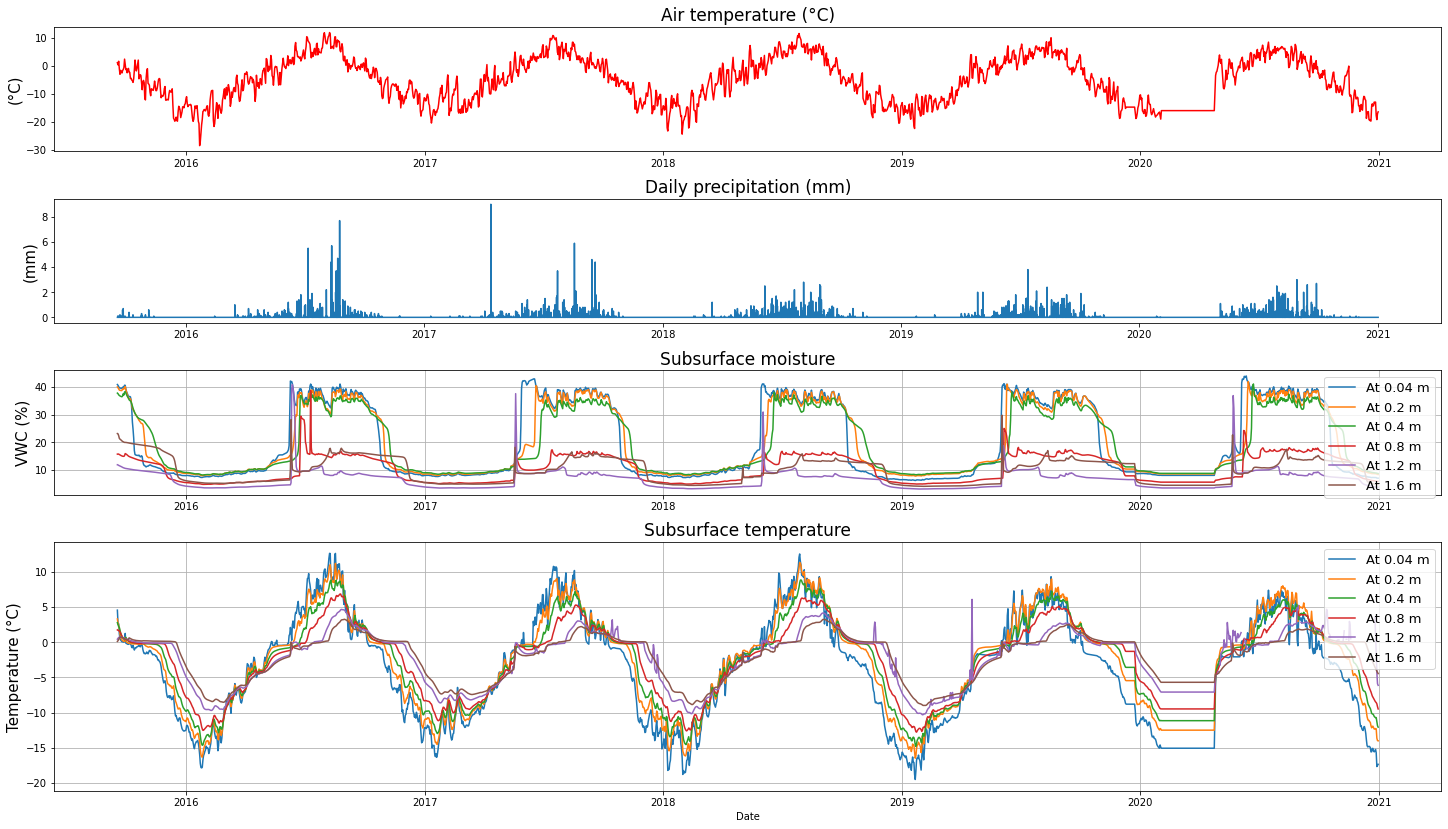

In [47]:
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,2,2], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[2, 0])
f2_ax2 = fig2.add_subplot(spec2[3, 0])
f2_ax3 = fig2.add_subplot(spec2[0, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 0])

#plt.title('Soil moisture data - Mean hourly values (linearly interpolated for missing values)')

f2_ax1.set_title('Subsurface moisture',fontsize=17)
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.04 m (%)'], label='At 0.04 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.2 m (%)'], label='At 0.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.4 m (%)'], label='At 0.4 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.8 m (%)'], label='At 0.8 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.2 m (%)'], label='At 1.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.6 m (%)'], label='At 1.6 m')
f2_ax1.set_ylabel('VWC (%)',fontsize=15)
#f2_ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#f2_ax1.xlabel('Date')
f2_ax1.legend(loc=1,fontsize=13)
f2_ax1.grid(True)

f2_ax2.set_title('Subsurface temperature',fontsize=17)
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.04 m (°C)'], label='At 0.04 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.2 m (°C)'], label='At 0.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.4 m (°C)'], label='At 0.4 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.8 m (°C)'], label='At 0.8 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.2 m (°C)'], label='At 1.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.6 m (°C)'], label='At 1.6 m')
f2_ax2.set_ylabel('Temperature (°C)',fontsize=15)
#f2_ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
f2_ax2.set_xlabel('Date')
f2_ax2.legend(loc=1,fontsize=13)
f2_ax2.grid(True)

f2_ax3.set_title('Air temperature (°C)',fontsize=17)
f2_ax3.plot(data_AWS_syn['Air temperature at 5 m (°C)'],'r')
f2_ax3.set_ylabel('(°C)',fontsize=15)



f2_ax4.set_title('Daily precipitation (mm)',fontsize=17)
f2_ax4.plot(data_AWS_prep['Precipitation at 10 m (mm)'])
f2_ax4.set_ylabel('(mm)',fontsize=15)


#plt.savefig('met_data.png',dpi=300,bbox_inches='tight')

### Reducing the data to the year 2017

In [48]:
data_AWS_syn_2017 = data_AWS_syn.loc['2017']

# Changing the units of temperature to Kelvin

data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.04 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.4 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.4 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.8 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.8 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.6 m (°C)'] + 273.15

#### Plotting the simulated and measured data
1. Subsurface temperature data and moisture data

In [49]:
data_AWS_syn_2017.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=365, freq='D')

In [50]:
# Converting the index of observation dataframe:

df_simulated = df_observation.copy()
df_simulated_2 = df_observation_2.copy()

# Slicing only 1 year of simulated data
df_simulated_2017 = df_simulated.loc[0:364]
df_simulated_2017_2 = df_simulated_2.loc[0:364]

# Changing the index
df_simulated_2017.index = data_AWS_syn_2017.index
df_simulated_2017_2.index = data_AWS_syn_2017.index

df_simulated_2017.head()

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,1.155867e+06,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,...,0.730143,0.863900,0.868657,0.877359,0.893271,0.900467,0.900467,0.949999,0.949999,0.0
2017-01-02,86400.0,1.155867e+06,259.595452,260.394406,262.114665,264.682213,267.689041,269.672938,270.075136,270.144919,...,0.741103,0.884837,0.886308,0.888544,0.896303,0.900953,0.900501,0.949999,0.949999,1.0
2017-01-03,172800.0,1.155867e+06,259.742580,260.257438,261.401177,263.265772,265.961638,268.704769,269.749526,270.093702,...,0.741158,0.885550,0.888278,0.892748,0.900937,0.902888,0.900834,0.949999,0.949999,2.0
2017-01-04,259200.0,1.155867e+06,260.650811,260.973951,261.717226,263.015069,265.137820,267.863113,269.314428,269.989040,...,0.740861,0.885243,0.888582,0.894262,0.903918,0.905102,0.901492,0.949999,0.949999,3.0
2017-01-05,345600.0,1.155867e+06,260.823613,261.108580,261.748867,262.843363,264.655348,267.212934,268.859763,269.835670,...,0.740802,0.885211,0.888784,0.895045,0.905784,0.907069,0.902402,0.949999,0.949999,4.0


In [51]:
# Coverting saturation to VWC [Liquid]: VWC = saturation * porosity
porosity_peat = 0.85 # Peat layer until 0.385
porosity_mineral = 0.5 # Mineral layer until 

df_simulated_2017['Soil moisture at - 0.04 m (VWC %)'] = df_simulated_2017.loc[:,'point -0.04 saturation liquid']*porosity_peat*100
df_simulated_2017['Soil moisture at - 0.2 m (VWC %)'] = df_simulated_2017.loc[:,'point -0.2 saturation liquid']*porosity_peat*100
df_simulated_2017['Soil moisture at - 0.4 m (VWC %)'] = df_simulated_2017.loc[:,'point -0.4 saturation liquid']*porosity_mineral*100
df_simulated_2017['Soil moisture at - 0.8 m (VWC %)'] = df_simulated_2017.loc[:,'point -0.8 saturation liquid']*porosity_mineral*100
df_simulated_2017['Soil moisture at - 1.2 m (VWC %)'] = df_simulated_2017.loc[:,'point -1.2 saturation liquid']*porosity_mineral*100
df_simulated_2017['Soil moisture at - 1.6 m (VWC %)'] = df_simulated_2017.loc[:,'point -1.6 saturation liquid']*porosity_mineral*100

In [52]:
# Coverting saturation to VWC [Liquid]: VWC = saturation * porosity
porosity_peat = 0.85 # Peat layer until 0.385
porosity_mineral = 0.5 # Mineral layer until 

df_simulated_2017_2['Soil moisture at - 0.04 m (VWC %)'] = df_simulated_2017_2.loc[:,'point -0.04 saturation liquid']*porosity_peat*100
df_simulated_2017_2['Soil moisture at - 0.2 m (VWC %)'] = df_simulated_2017_2.loc[:,'point -0.2 saturation liquid']*porosity_peat*100
df_simulated_2017_2['Soil moisture at - 0.4 m (VWC %)'] = df_simulated_2017_2.loc[:,'point -0.4 saturation liquid']*porosity_mineral*100
df_simulated_2017_2['Soil moisture at - 0.8 m (VWC %)'] = df_simulated_2017_2.loc[:,'point -0.8 saturation liquid']*porosity_mineral*100
df_simulated_2017_2['Soil moisture at - 1.2 m (VWC %)'] = df_simulated_2017_2.loc[:,'point -1.2 saturation liquid']*porosity_mineral*100
df_simulated_2017_2['Soil moisture at - 1.6 m (VWC %)'] = df_simulated_2017_2.loc[:,'point -1.6 saturation liquid']*porosity_mineral*100

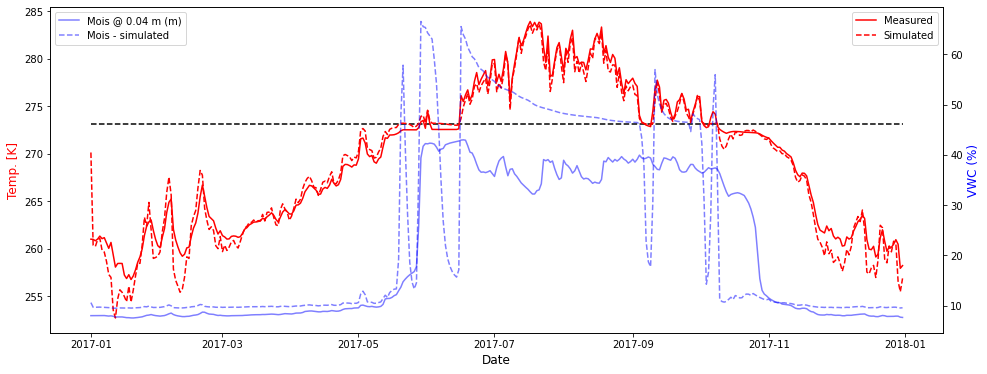

In [53]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, ax = plt.subplots()
fig.set_size_inches(16,6)

# Defining the x-axis
time = data_AWS_syn_2017.index

# Make a plot
ax.plot(time, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'], 'r',label='Measured')
ax.plot(time, df_simulated_2017['point -0.04 temperature [K]'],'r--',label='Simulated')
#ax.plot(time, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'], 'r',label='Measured')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temp. [K]', fontsize=12,color='r')
ax.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib
ax.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')

ax2 = ax.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.04 m (%)'], 'b',label='Mois @ 0.04 m (m)',alpha=0.5)
ax2.plot(time, df_simulated_2017['Soil moisture at - 0.04 m (VWC %)'], 'b--',label='Mois - simulated', alpha=0.5)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=12, color='b')
ax2.legend(loc=2)

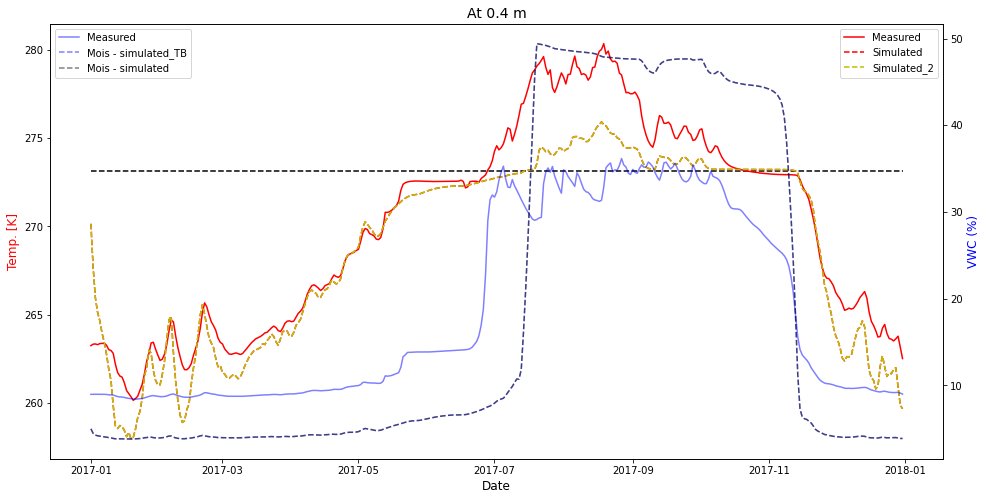

In [54]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# Defining the x-axis
time = data_AWS_syn_2017.index

# Make a plot
ax.plot(time, data_AWS_syn_2017['Soil temperature at - 0.4 m (K)'], 'r',label='Measured')
ax.plot(time, df_simulated_2017['point -0.4 temperature [K]'],'r--',label='Simulated')
ax.plot(time, df_simulated_2017_2['point -0.4 temperature [K]'],'y--',label='Simulated_2')
#ax.plot(time, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'], 'r',label='Measured')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temp. [K]', fontsize=12,color='r')
ax.set_title('At 0.4 m', fontsize=14)
ax.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib
ax.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')

ax2 = ax.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.4 m (%)'], 'b',label='Measured',alpha=0.5)
ax2.plot(time, df_simulated_2017['Soil moisture at - 0.4 m (VWC %)'], 'b--',label='Mois - simulated_TB', alpha=0.5)
ax2.plot(time, df_simulated_2017_2['Soil moisture at - 0.4 m (VWC %)'], 'k--',label='Mois - simulated', alpha=0.5)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=12, color='b')
ax2.legend(loc=2)

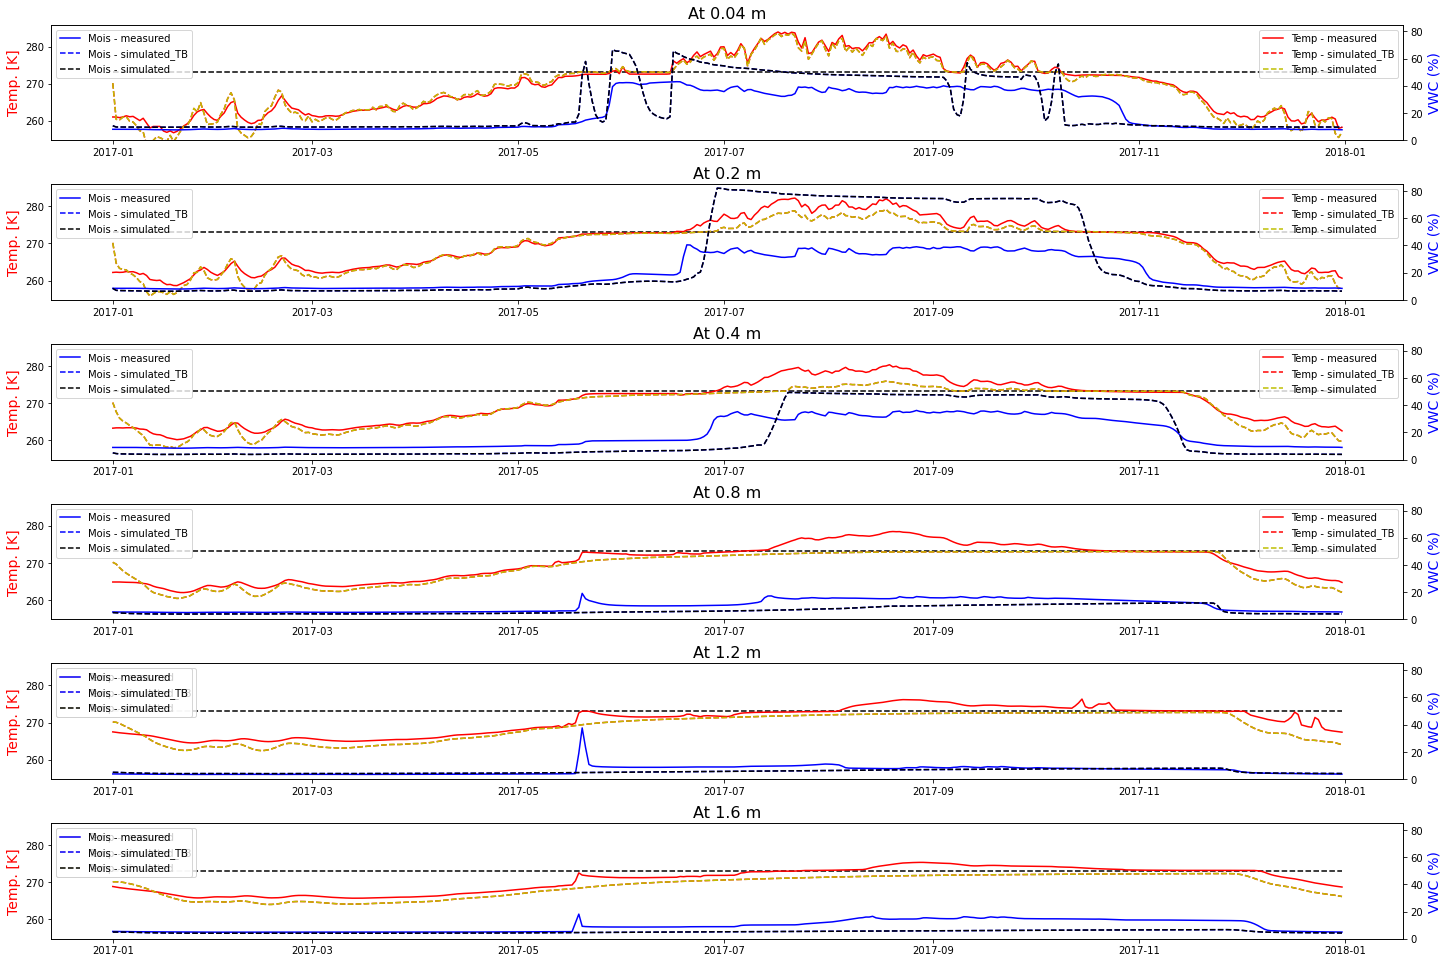

In [55]:
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[1, 0])
f2_ax2 = fig2.add_subplot(spec2[2, 0])
f2_ax3 = fig2.add_subplot(spec2[3, 0])
f2_ax4 = fig2.add_subplot(spec2[4, 0])
f2_ax5 = fig2.add_subplot(spec2[5, 0])
f2_ax6 = fig2.add_subplot(spec2[6, 0])

# Defining the x-axis
time = data_AWS_syn_2017.index

# Make a plot

# Plot f2_ax1 - @ 0.04 m
f2_ax1.plot(time, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'], 'r',label='Temp - measured')
f2_ax1.plot(time, df_simulated_2017['point -0.04 temperature [K]'],'r--',label='Temp - simulated_TB')
f2_ax1.plot(time, df_simulated_2017_2['point -0.04 temperature [K]'],'y--',label='Temp - simulated')
f2_ax1.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax1.set_xlabel('Date', fontsize=15)
f2_ax1.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax1.set_title('At 0.04 m', fontsize=16)
f2_ax1.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax1.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax1.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.04 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 0.04 m (VWC %)'], 'b--',label='Mois - simulated_TB')
ax2.plot(time, df_simulated_2017_2['Soil moisture at - 0.04 m (VWC %)'], 'k--',label='Mois - simulated')

#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)

# Plot f2_ax2 - @ 0.2 m
f2_ax2.plot(time, data_AWS_syn_2017['Soil temperature at - 0.2 m (K)'], 'r',label='Temp - measured')
f2_ax2.plot(time, df_simulated_2017['point -0.2 temperature [K]'],'r--',label='Temp - simulated_TB')
f2_ax2.plot(time, df_simulated_2017_2['point -0.2 temperature [K]'],'y--',label='Temp - simulated')
f2_ax2.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax2.set_xlabel('Date', fontsize=15)
f2_ax2.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax2.set_title('At 0.2 m', fontsize=16)
f2_ax2.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax2.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax2.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.2 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 0.2 m (VWC %)'], 'b--',label='Mois - simulated_TB')
ax2.plot(time, df_simulated_2017_2['Soil moisture at - 0.2 m (VWC %)'], 'k--',label='Mois - simulated')
#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)

# Plot f2_ax3 - @ 0.4 m
f2_ax3.plot(time, data_AWS_syn_2017['Soil temperature at - 0.4 m (K)'], 'r',label='Temp - measured')
f2_ax3.plot(time, df_simulated_2017['point -0.4 temperature [K]'],'r--',label='Temp - simulated_TB')
f2_ax3.plot(time, df_simulated_2017_2['point -0.4 temperature [K]'],'y--',label='Temp - simulated')
f2_ax3.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax3.set_xlabel('Date', fontsize=15)
f2_ax3.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax3.set_title('At 0.4 m', fontsize=16)
f2_ax3.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax3.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax3.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.4 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 0.4 m (VWC %)'], 'b--',label='Mois - simulated_TB')
ax2.plot(time, df_simulated_2017_2['Soil moisture at - 0.4 m (VWC %)'], 'k--',label='Mois - simulated')
#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)



# Plot f2_ax4 - @ 0.8 m
f2_ax4.plot(time, data_AWS_syn_2017['Soil temperature at - 0.8 m (K)'], 'r',label='Temp - measured')
f2_ax4.plot(time, df_simulated_2017['point -0.8 temperature [K]'],'r--',label='Temp - simulated_TB')
f2_ax4.plot(time, df_simulated_2017_2['point -0.8 temperature [K]'],'y--',label='Temp - simulated')
f2_ax4.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax3.set_xlabel('Date', fontsize=15)
f2_ax4.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax4.set_title('At 0.8 m', fontsize=16)
f2_ax4.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax4.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax4.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.8 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 0.8 m (VWC %)'], 'b--',label='Mois - simulated_TB')
ax2.plot(time, df_simulated_2017_2['Soil moisture at - 0.8 m (VWC %)'], 'k--',label='Mois - simulated')

#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)

# Plot f2_ax4 - @ 1.2 m
f2_ax5.plot(time, data_AWS_syn_2017['Soil temperature at - 1.2 m (K)'], 'r',label='Temp - measured')
f2_ax5.plot(time, df_simulated_2017['point -1.2 temperature [K]'],'r--',label='Temp - simulated_TB')
f2_ax5.plot(time, df_simulated_2017_2['point -1.2 temperature [K]'],'y--',label='Temp - simulated')
f2_ax5.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax3.set_xlabel('Date', fontsize=15)
f2_ax5.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax5.set_title('At 1.2 m', fontsize=16)
f2_ax5.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax5.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax5.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 1.2 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 1.2 m (VWC %)'], 'b--',label='Mois - simulated_TB')
ax2.plot(time, df_simulated_2017_2['Soil moisture at - 1.2 m (VWC %)'], 'k--',label='Mois - simulated')
#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)



# Plot f2_ax6 - @ 1.6 m
f2_ax6.plot(time, data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'], 'r',label='Temp - measured')
f2_ax6.plot(time, df_simulated_2017['point -1.6 temperature [K]'],'r--',label='Temp - simulated_TB')
f2_ax6.plot(time, df_simulated_2017_2['point -1.6 temperature [K]'],'y--',label='Temp - simulated')
f2_ax6.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax3.set_xlabel('Date', fontsize=15)
f2_ax6.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax6.set_title('At 1.6 m', fontsize=16)
f2_ax6.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax6.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax6.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 1.6 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 1.6 m (VWC %)'], 'b--',label='Mois - simulated_TB')
ax2.plot(time, df_simulated_2017_2['Soil moisture at - 1.6 m (VWC %)'], 'k--',label='Mois - simulated')
#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)

Comments:
* Temperature predictions: The subsurface temperature predictions are quite good. However, with depth the simulated accuracy reduces. The temperature predictions are mostly underpredicted. 
* The initial assumed temperature (270.15K = -3°C) seems to be high and a lower value can be assumed (Maybe = 265.15 K = -8.0°C]. The results from the dynamic simulation can be used as the initial conditions for the actual model.
* The simulated moisture does not show good agreement with the measurements. The variations in moisture are not captured well (Especially during the thaw period). The peat (until 0.385 m) & mineral material  seems to be less porous (assume less porosity and change conductivity values?). At 0.04 m - the moisture remains more or less constant with fluctuations mainly during the thawing period. Due to assumed hydraulic properties, moisture seems to be over-predicted (during thawing period) at depths of 0.04, 0.2, 0.4. As the depth increases (from 0.8 m on - .. ), the simulated moisture remains constant although the measured results show variations during the thawing period (Consider a higher hydraulic influence - Change VGc, reduce porosity for mineral?).
* The following suggestions can be considered for the next set of simulations:
    - The mesh structure can be re-considered - Similar to Yakou column [With 0 - 30 cm & 30 cm - 10 m (Not sure of the lower depth?)]
    - The porosity of peat and mineral layer can be reduced!
    - We can increase the thermal conductivity of both the layers since temperature is being consistently under-predicted!
    

### 8. Finding the RMSE value - yearly average, monthly average, plotting time series RMSE value
1. Finding the yearly average
2. Finding the monthly average
3. Time series RMSE value

<AxesSubplot:xlabel='TIMESTAMP'>

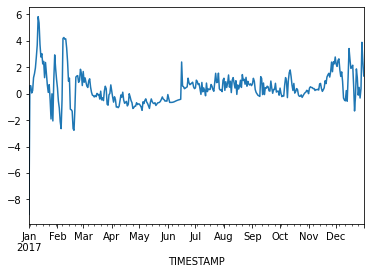

In [56]:
((data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'] - df_simulated_2017['point -0.04 temperature [K]'])).plot()

In [57]:
name_VarDepth = 'Temp - 1.6 m'

rmse_monthly = pd.DataFrame(index=df_simulated_2017['point -1.6 temperature [K]'].resample('M').mean().index, data=np.arange(1,13,1),columns=[f'{name_VarDepth}'])

rmse_monthly


,Temp - 1.6 m
TIMESTAMP,
2017-01-31,1
2017-02-28,2
2017-03-31,3
2017-04-30,4
2017-05-31,5
2017-06-30,6
2017-07-31,7
2017-08-31,8
2017-09-30,9


0
1
2
3
4
5
6
7
8
9
10
11


<AxesSubplot:xlabel='TIMESTAMP'>

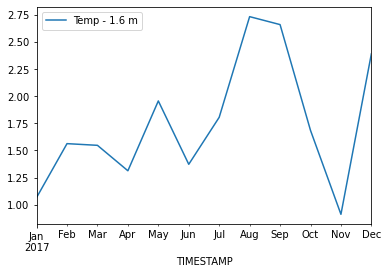

In [58]:
month = np.arange(1,13,1)
rmse_monthly = pd.DataFrame(index=df_simulated_2017['point -1.6 temperature [K]'].resample('M').mean().index, data=np.arange(1,13,1),columns=[f'{name_VarDepth}'])

for i in range(len(month)):
    
    sim_monthly = df_simulated_2017['point -1.6 temperature [K]'].resample('M').mean()
    
    # Extracting the monthly values from January - December
    sim_month = data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'][f'2017-{month[i]}']
    measured_month = df_simulated_2017['point -1.6 temperature [K]'][f'2017-{month[i]}']
    
    # Finding the RMSE value and storing it in a dateframe
    name_VarDepth = 'Temp - 1.6 m'
    
    x_monthly = np.array(np.arange(1,13,1))
    
    rmse_monthly.iloc[i,0] = np.sqrt(((sim_month - measured_month)**2).mean())
    

    #print(np.sqrt(((sim_month - measured_month)**2).mean()))
    print(i)

rmse_monthly.plot()

In [59]:
### Writing a function to find the RMSE value:
def RMSE_function(sim, measured, time_scale, name_VarDepth):
    """
    The function is written to find the RMSE (Root Mean Square Error) between the measured and simulated value.
    
    Parameters
    ------
    
    Input parameters:
    
    sim : Pandas dataframes series with daily simulated values. 
    
    measured: Pandas dataframes series with daily measured values. 
    
    time_scale : Choose the time scale in which you would like your results.
    
    (a). 'yearly' - The RMSE values are averaged for the entire year
    
    (b). 'monthly' - The RMSE values are averaged for the entire month
    
    (c). 'daily' - The daily RMSE values are the output. 
    
    name_VarDepth : Provide the name of the variable and the depth (Easy to create dataframe with different columns as Variable - Depths)
            
    Output parameters:
    
    rmse_yearly : Single value, Finds the RMSE between the simulated and measured - averages it over the year
    
    rmse_monthly : Pandas dataframe, Finds the RMSE between the simulated and measured - averaged over a month 
    
    
    """
    
    if time_scale == 'yearly':
        rmse_yearly = np.sqrt(((sim - measured) ** 2).mean())
        
        return rmse_yearly
    
    elif time_scale == 'monthly':
        
        # Creating a numpy array with month numericals from 1,1,2,3 ..12
        month = np.arange(1,13,1)
        
        # Creating a dataframe with monthly indexes
        rmse_monthly = pd.DataFrame(index=sim.resample('M').mean().index, data=np.arange(1,13,1),columns=[f'{name_VarDepth}'])

        for i in range(len(month)):

            # Extracting the monthly values from January - December
            sim_month = sim[f'2017-{month[i]}']
            measured_month = measured[f'2017-{month[i]}']

            
            # Finding the RMSE value and storing it in a dataframe
            rmse_monthly.iloc[i,0] = np.sqrt(((sim_month - measured_month)**2).mean())
            
        return rmse_monthly

In [60]:
# Test - rmse_function
sim = df_simulated_2017['point -0.04 temperature [K]']
measured = data_AWS_syn_2017['Soil temperature at - 0.04 m (K)']
 

rmse_yearly = RMSE_function(sim, measured, time_scale='yearly', name_VarDepth='Temp-1.6')
rmse_monthly = RMSE_function(sim, measured, time_scale='monthly', name_VarDepth='Temp-1.6')

In [61]:
df_simulated_2017.columns

Index(['time [s]', 'water content [mol]', 'point -0.01 temperature [K]',
       'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -30.0 temperature [K]', 'point -40.0 temperature [K]',
       'point -0.01 saturation liquid', 'point -0.04 saturation liquid',
       'point -0.1 saturation liquid', 'point -0.2 saturation liquid',
       'point -0.4 saturation liquid', 'point -0.8 saturation liquid',
       'point -1.2 saturation liquid', 'point -1.6 saturation liquid',
       'point -5.0 saturation liquid', 'point -10.0 saturation liquid',
       'point -0.01 saturation ice', 'point -0.04 saturation ice',
       'point -0.1 saturation ice', 'point -0.2 saturation ice',
       'point -0.4 saturation 

In [62]:
rmse_yearly = np.array([])

rmse_yearly

array([], dtype=float64)

In [63]:
### Creating a loop to store the yearly and monthly RMSE values for all variables

# Depths - Note the numbering
depths = ['0.04','0.2','0.4','0.8','1.2','1.6']

# Creating a numpy array to store the rmse (yearly) values
rmse_yearly_temp = np.array([])
rmse_yearly_mois = np.array([])

# Creating a dataframe to store the monthly RMSE temperature and moisture
rmse_month_values = pd.DataFrame(index=df_simulated_2017['point -0.04 temperature [K]'].resample('M').mean().index, data=None, columns=None)



for i in range(len(depths)):
    
    # Calculating the yearly RMSE values - Temperature & Moisture
    sim_temp = df_simulated_2017[f'point -{depths[i]} temperature [K]']
    measured_temp = data_AWS_syn_2017[f'Soil temperature at - {depths[i]} m (K)']
    
    sim_mois = df_simulated_2017[f'Soil moisture at - {depths[i]} m (VWC %)']
    measured_mois = data_AWS_syn_2017[f'Soil moisture at - {depths[i]} m (%)']
    
    value_temp = RMSE_function(sim_temp, measured_temp, time_scale='yearly', name_VarDepth='Temp-1.6')
    rmse_yearly_temp = np.append(rmse_yearly_temp, value_temp)
    
    value_mois = RMSE_function(sim_mois, measured_mois, time_scale='yearly', name_VarDepth='Temp-1.6')
    rmse_yearly_mois = np.append(rmse_yearly_mois, value_mois)
    
    # Calculating the monthly RMSE values
    name_TempDepth = f'Temp-{depths[i]}'
    name_MoisDepth = f'Mois-{depths[i]}'
    
    rmse_month_values[f'{name_TempDepth}'] = RMSE_function(sim_temp, measured_temp, time_scale='monthly', name_VarDepth='{name_TempDepth}')
    rmse_month_values[f'{name_MoisDepth}'] = RMSE_function(sim_mois, measured_mois, time_scale='monthly', name_VarDepth='{name_MoisDepth}')
    

rmse_month_values

,Temp-0.04,Mois-0.04,Temp-0.2,Mois-0.2,Temp-0.4,Mois-0.4,Temp-0.8,Mois-0.8,Temp-1.2,Mois-1.2,Temp-1.6,Mois-1.6
TIMESTAMP,,,,,,,,,,,,
2017-01-31,2.842094,1.796749,2.543979,1.702210,2.370692,4.742025,2.035929,1.104685,1.801879,0.717148,1.065797,0.644914
2017-02-28,2.211531,1.629021,1.871328,1.769674,1.663136,4.836784,1.397827,1.185090,1.821607,0.596200,1.562646,0.734302
2017-03-31,0.625670,1.608724,0.806470,1.753245,0.916509,4.826638,1.036391,1.167827,1.606376,0.618031,1.547082,0.725731
2017-04-30,0.701006,1.221397,0.257366,1.882467,0.336075,5.114122,0.621133,1.256216,0.971853,0.651617,1.312523,0.730994
2017-05-31,0.704857,13.821301,0.296913,2.096714,0.511987,6.519053,1.265633,4.935629,1.754083,7.647218,1.956356,3.802819
2017-06-30,0.740198,20.241544,1.356243,17.804627,0.380734,10.743064,0.822769,4.282126,0.816033,3.448384,1.372101,3.774556
2017-07-31,0.690676,15.193427,3.053709,44.075695,3.850403,19.069412,2.612213,7.455694,0.969074,3.825136,1.805435,4.970926
2017-08-31,0.849871,10.275728,2.683278,39.180253,3.909192,14.492679,4.742699,6.655224,2.920427,2.136966,2.733652,8.835324
2017-09-30,0.572916,10.983131,1.532228,36.292700,1.996951,12.547892,2.537654,5.461971,2.306312,1.459448,2.660325,9.200929


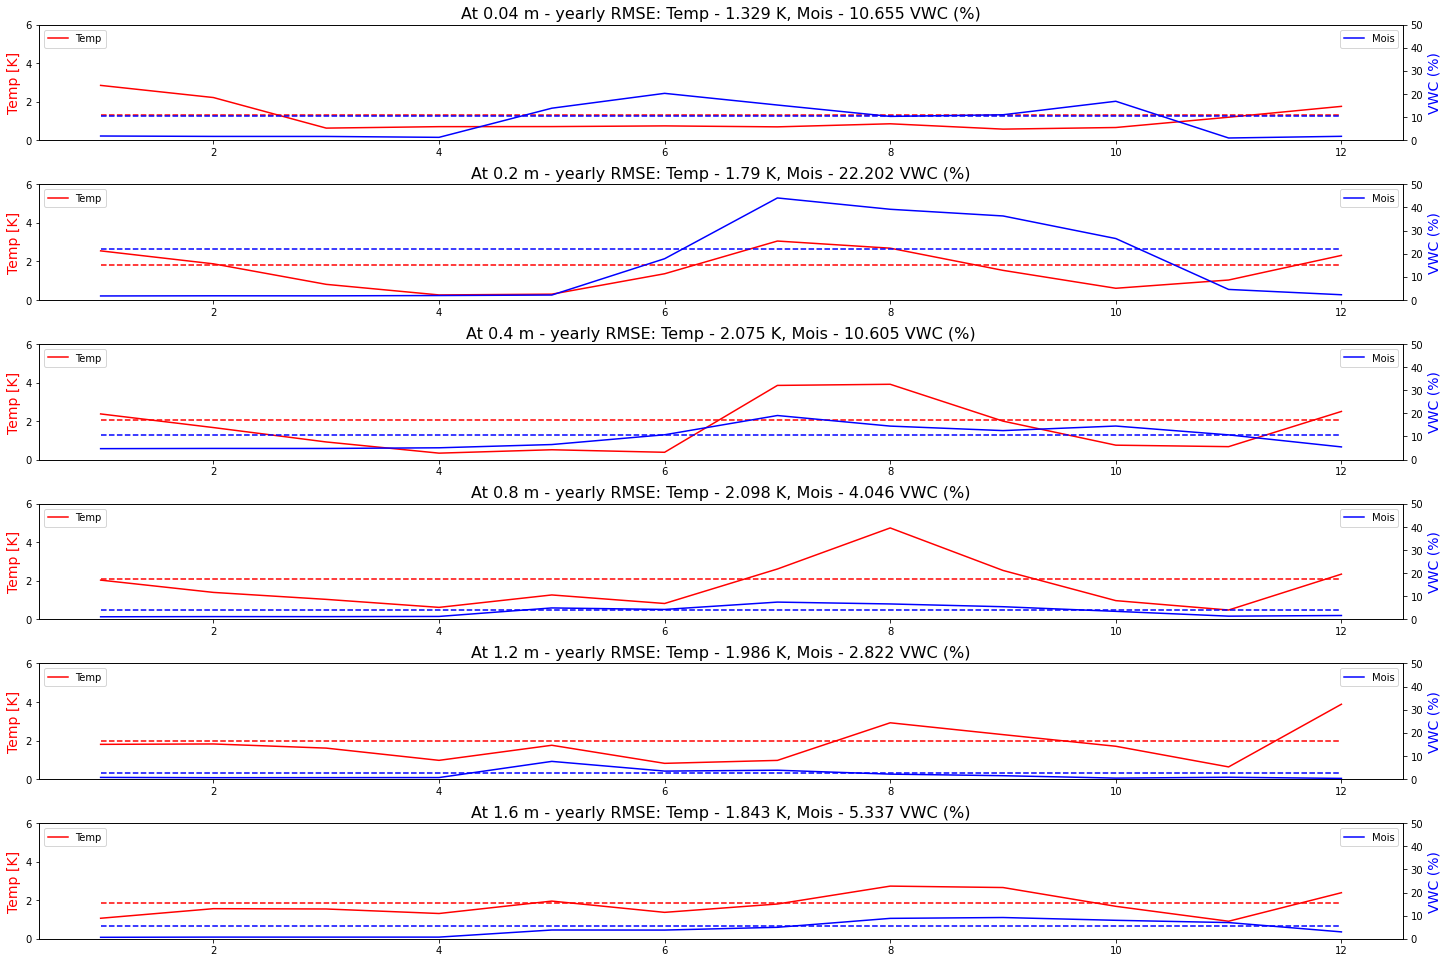

In [64]:
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[1, 0])
f2_ax2 = fig2.add_subplot(spec2[2, 0])
f2_ax3 = fig2.add_subplot(spec2[3, 0])
f2_ax4 = fig2.add_subplot(spec2[4, 0])
f2_ax5 = fig2.add_subplot(spec2[5, 0])
f2_ax6 = fig2.add_subplot(spec2[6, 0])

# Defining the x-axis
time = np.arange(1,13,1)

# Depths - Note the numbering
depths = ['0.04','0.2','0.4','0.8','1.2','1.6']

# Make a plot

# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib

for i in range(6):
    locals()["f2" + "_ax" + str(i+1)].plot(time, rmse_month_values[f'Temp-{depths[i]}'].values, 'r',label='Temp')
    locals()["f2" + "_ax" + str(i+1)].hlines(y=rmse_yearly_temp[i], xmin=1, xmax=12,color='r', linestyle='--')
    #f2_ax1.set_xlabel('Date', fontsize=15)
    locals()["f2" + "_ax" + str(i+1)].set_ylabel('Temp [K]', fontsize=14,color='r')
    locals()["f2" + "_ax" + str(i+1)].set_title(f'At {depths[i]} m - yearly RMSE: Temp - {np.round(rmse_yearly_temp[i],3)} K, Mois - {np.round(rmse_yearly_mois[i],3)} VWC (%)', fontsize=16)
    locals()["f2" + "_ax" + str(i+1)].set_ylim(0,6)
    locals()["f2" + "_ax" + str(i+1)].legend(loc=2)
    

    ax2 = locals()["f2" + "_ax" + str(i+1)].twinx()
    ax2.plot(time, rmse_month_values[f'Mois-{depths[i]}'].values, 'b',label='Mois')
    ax2.hlines(y=rmse_yearly_mois[i],xmin=1, xmax=12, color='b', linestyle='--')
    #ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
    ax2.set_ylim(0, 50)
    ax2.legend(loc=1)

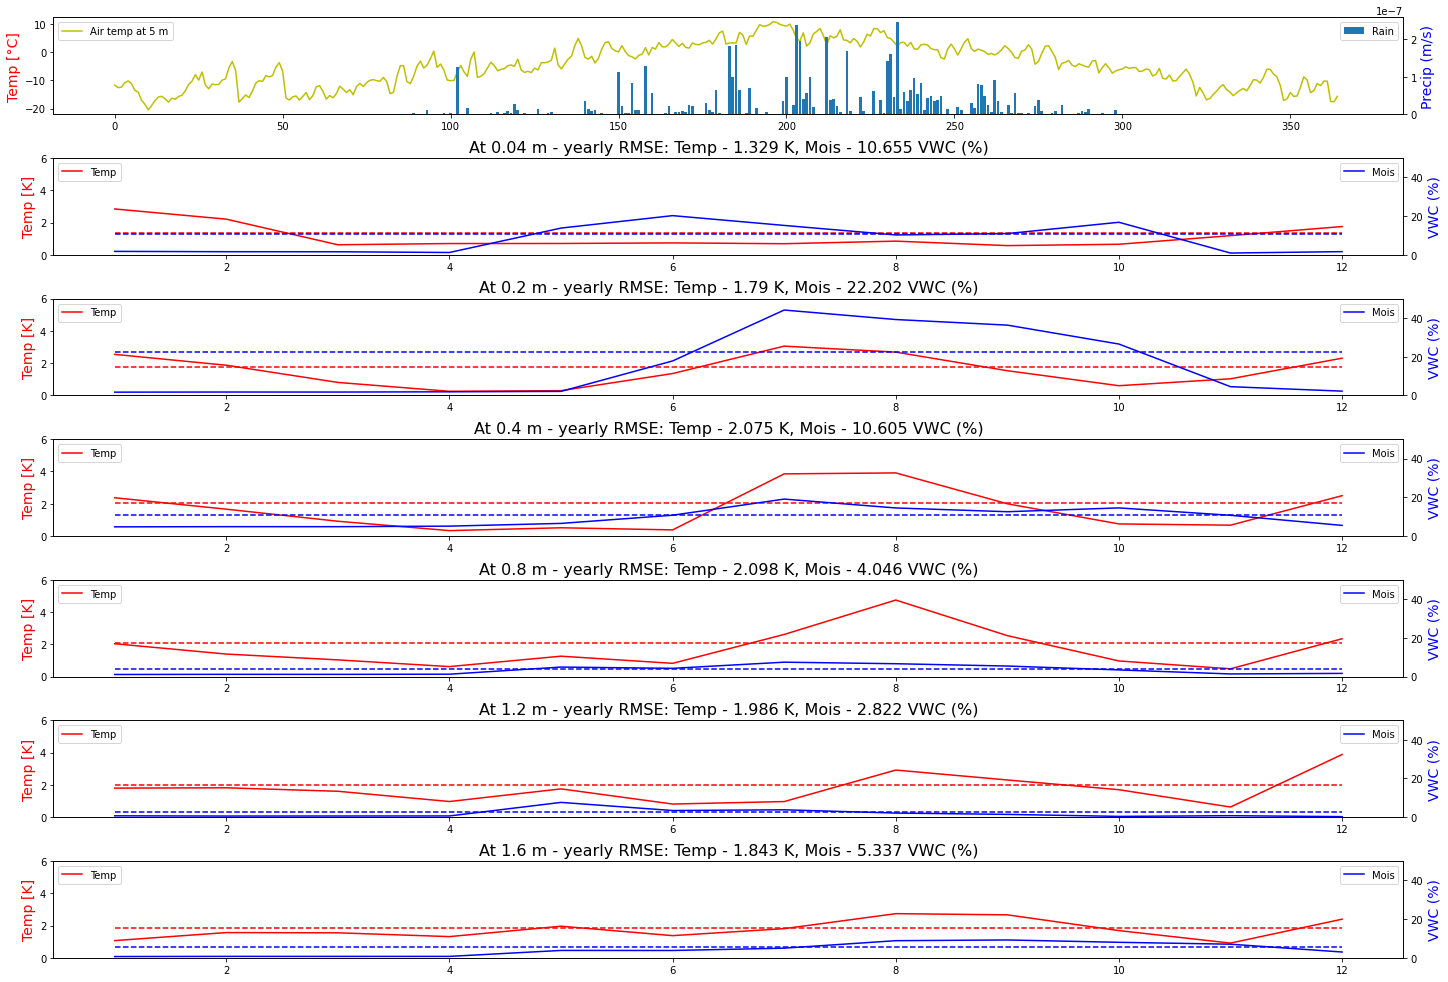

In [65]:
# Plot the values along with temperature and precipitation:
# Extracting them for a year:
air_temp_2017 = air_temp_2017_5yrs[0:365]
prep_2017 = precip_2017_5yrs[0:365]
snowprep_2017 = snowprecip_2017_5yrs[0:365]

fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=8, height_ratios=[1,1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[1, 0])
f2_ax2 = fig2.add_subplot(spec2[2, 0])
f2_ax3 = fig2.add_subplot(spec2[3, 0])
f2_ax4 = fig2.add_subplot(spec2[4, 0])
f2_ax5 = fig2.add_subplot(spec2[5, 0])
f2_ax6 = fig2.add_subplot(spec2[6, 0])
f2_ax7 = fig2.add_subplot(spec2[7, 0])


# 1st axis is for temperature and the 2nd axis is for precipitation

f2_ax1.plot(air_temp_2017-273.15,'y', label='Air temp at 5 m')
f2_ax1.set_ylabel('Temp [°C]',fontsize=14,color='r')
f2_ax1.legend(loc=2)

ax2 = f2_ax1.twinx()
ax2.bar(x=np.arange(1,366,1), height=prep_2017, label='Rain')
#ax2.bar(x=np.arange(1,366,1), height=snowprep_2017, label='Snow')
ax2.legend(loc=1)
ax2.set_ylabel('Precip (m/s)', fontsize=14, color='b')

# Defining the x-axis
time = np.arange(1,13,1)

# Depths - Note the numbering
depths = ['0.04','0.2','0.4','0.8','1.2','1.6']

# Make a plot

# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib

for i in range(6):
    locals()["f2" + "_ax" + str(i+2)].plot(time, rmse_month_values[f'Temp-{depths[i]}'].values, 'r',label='Temp')
    locals()["f2" + "_ax" + str(i+2)].hlines(y=rmse_yearly_temp[i], xmin=1, xmax=12,color='r', linestyle='--')
    #f2_ax1.set_xlabel('Date', fontsize=15)
    locals()["f2" + "_ax" + str(i+2)].set_ylabel('Temp [K]', fontsize=14,color='r')
    locals()["f2" + "_ax" + str(i+2)].set_title(f'At {depths[i]} m - yearly RMSE: Temp - {np.round(rmse_yearly_temp[i],3)} K, Mois - {np.round(rmse_yearly_mois[i],3)} VWC (%)', fontsize=16)
    locals()["f2" + "_ax" + str(i+2)].set_ylim(0,6)
    locals()["f2" + "_ax" + str(i+2)].legend(loc=2)
    

    ax2 = locals()["f2" + "_ax" + str(i+2)].twinx()
    ax2.plot(time, rmse_month_values[f'Mois-{depths[i]}'].values, 'b',label='Mois')
    ax2.hlines(y=rmse_yearly_mois[i],xmin=1, xmax=12, color='b', linestyle='--')
    #ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
    ax2.set_ylim(0, 50)
    ax2.legend(loc=1)

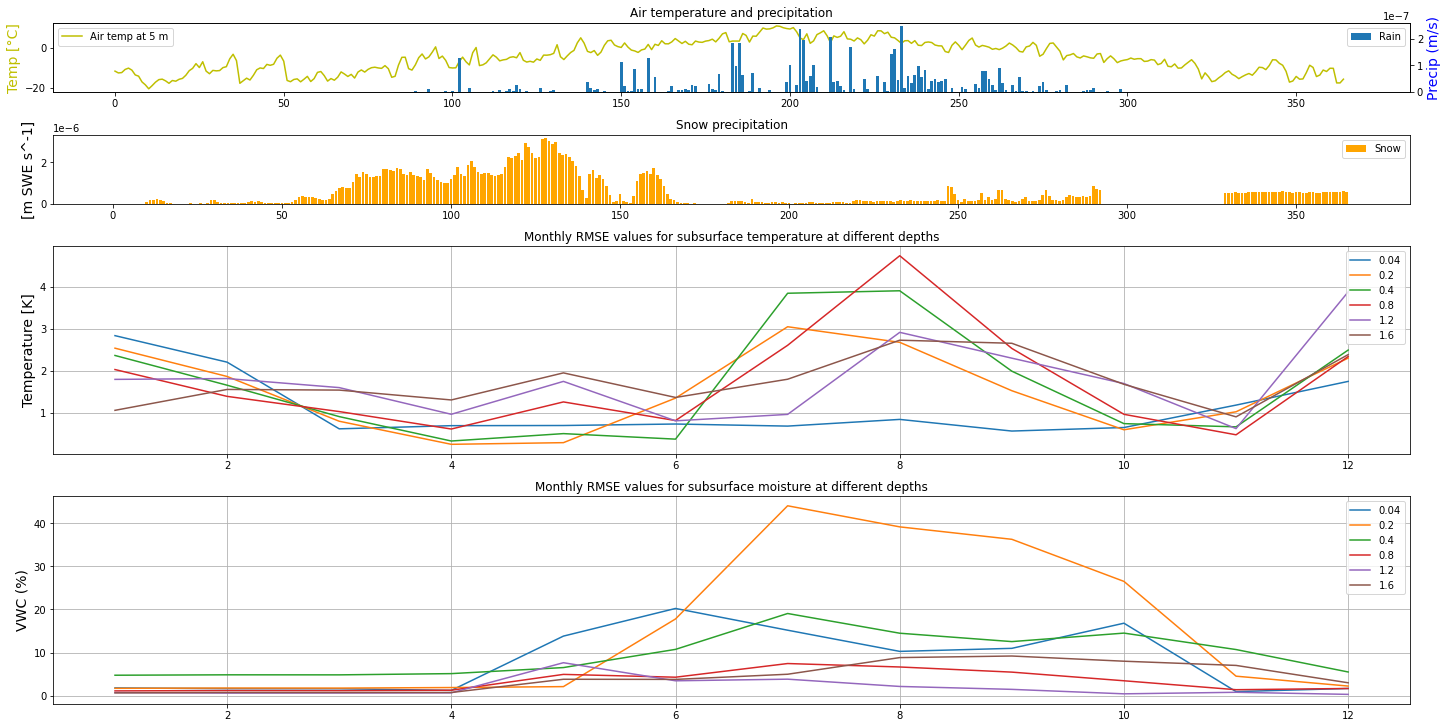

In [66]:
# Plot the values along with temperature and precipitation:
# Extracting them for a year:
air_temp_2017 = air_temp_2017_5yrs[0:365]
prep_2017 = precip_2017_5yrs[0:365]
snowprep_2017 = snowprecip_2017_5yrs[0:365]

fig2 = plt.figure(figsize=(20,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,3,3], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])



# 1st axis is for temperature and the 2nd axis is for precipitation

f2_ax1.plot(air_temp_2017-273.15,'y', label='Air temp at 5 m')
f2_ax1.set_ylabel('Temp [°C]',fontsize=14,color='y')
f2_ax1.legend(loc=2)
f2_ax1.set_title('Air temperature and precipitation')

ax2 = f2_ax1.twinx()
ax2.bar(x=np.arange(1,366,1), height=prep_2017, label='Rain')
#ax2.bar(x=np.arange(1,366,1), height=snowprep_2017, label='Snow')
ax2.legend(loc=1)
ax2.set_ylabel('Precip (m/s)', fontsize=14, color='b')

# Snow precipitation 
f2_ax2.bar(x=np.arange(1,366,1), height=snowprep_2017, color='orange', label='Snow')
f2_ax2.legend(loc=1)
f2_ax2.set_ylabel('[m SWE s^-1]', fontsize=14)
f2_ax2.set_title('Snow precipitation')
# Defining the x-axis
time = np.arange(1,13,1)

# Depths - Note the numbering
depths = ['0.04','0.2','0.4','0.8','1.2','1.6']

for i in range(6):
    f2_ax3.plot(time, rmse_month_values[f'Temp-{depths[i]}'].values,label=f'{depths[i]}')
    f2_ax4.plot(time, rmse_month_values[f'Mois-{depths[i]}'].values,label=f'{depths[i]}')
    
    f2_ax3.set_title('Monthly RMSE values for subsurface temperature at different depths')
    f2_ax4.set_title('Monthly RMSE values for subsurface moisture at different depths')
    
    f2_ax3.set_ylabel('Temperature [K]', fontsize=14)
    f2_ax4.set_ylabel('VWC (%)', fontsize=14)
    
    f2_ax3.grid(True)
    f2_ax4.grid(True)
    
    f2_ax3.legend()
    f2_ax4.legend()

### Plotting the RMSE value Vs Depth:

In [67]:
depths = [-0.04, -0.2, -0.4, -0.8, -1.2, -1.6]
depths[0]

-0.04

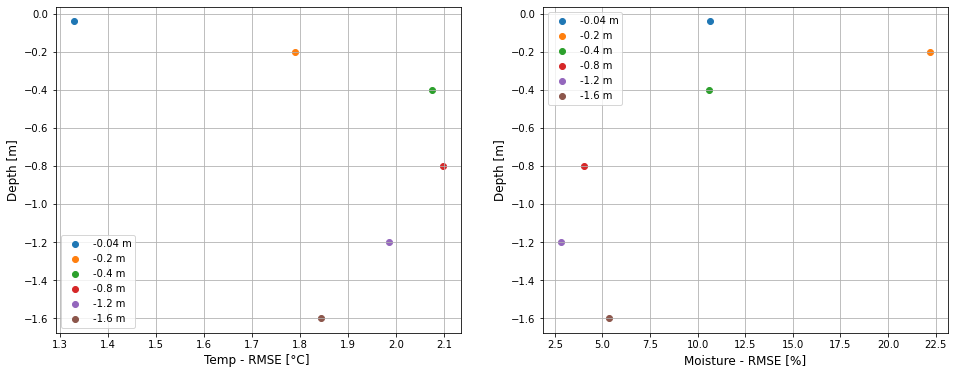

In [68]:
# Plot the values along with temperature and precipitation:

depths = [-0.04, -0.2, -0.4, -0.8, -1.2, -1.6]

# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)

for i in range(len(depths)):
    ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Temp - RMSE [°C] ', fontsize=12)
ax1.set_ylabel('Depth [m]', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Moisture - RMSE [%]', fontsize=12)
ax2.set_ylabel('Depth [m]', fontsize=12)
ax2.legend()
ax2.grid(True)
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


Comments:
* Comment on this!
